# **Stellar Object Classification- Using Strong Machine Learning Algorithms:**




In [56]:
from IPython.display import HTML
HTML('<h1 style="text-align:center; background-color:orange; color:black;  padding:22px;">STELLAR OBJECT CLASSIFICATION</h1>')

In [57]:
from IPython.display import Image
Image(url='https://c4.wallpaperflare.com/wallpaper/235/107/585/stars-space-galaxy-nebula-wallpaper-preview.jpg',width=1350,height=480)

# **IMPORTING IMPORTANT LIBRARIES:**

In [58]:
import pandas as pd, numpy as np, matplotlib.pyplot as plt, seaborn as sns
from matplotlib import cm
import plotly.express as px
import joblib
from sklearn.pipeline import make_pipeline
from sklearn.preprocessing import StandardScaler, LabelEncoder, label_binarize
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_predict
from sklearn.metrics import classification_report,confusion_matrix,r2_score,accuracy_score, roc_curve,RocCurveDisplay,auc
from sklearn.ensemble import RandomForestClassifier,AdaBoostClassifier,GradientBoostingClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier
from xgboost import XGBClassifier
from itertools import cycle

from yellowbrick.classifier import ROCAUC
from yellowbrick.style import set_style, set_palette
from yellowbrick.model_selection import CVScores
from yellowbrick.features import FeatureImportances
from yellowbrick.classifier import ClassPredictionError

import joblib


# **LOAD DATASET:**

In [59]:
df = pd.read_csv('star_classification.csv')

# **INTRODUCTION:**
A vast amount of astronomical data containing info about various celestial objects.

*   Using this dataset we are going to develop various ML models to classify objects.
*   Improving data analysis pipeline for research and study the Space.
---

# **Objectives:**


*   Categorized the objects into three classes -

1.   Stars
2.   Galaxies
3.   Quasars

*   Identify the best classification model.

*    Providing insights for future studies and deep-exploration of space.





# **DATASET DESCRIPTION:**
**Imp Features:**


*   alpha: Right Ascension angle (at J2000 epoch).
*   delta: Declination angle (at J2000 epoch).
*   u, g, r, i & v: Color indices (in different filters).
*   redshift: redshift value based on the increase in wavelength.
*   class: object class (galaxy, star or quasar object).




# **INSPCTION:**

In [60]:
df.head(3)

,obj_ID,alpha,delta,u,g,r,i,z,run_ID,rerun_ID,cam_col,field_ID,spec_obj_ID,class,redshift,plate,MJD,fiber_ID
0,1.237661e+18,135.689107,32.494632,23.87882,22.27530,20.39501,19.16573,18.79371,3606,301,2,79,6.543777e+18,GALAXY,0.634794,5812,56354,171
1,1.237665e+18,144.826101,31.274185,24.77759,22.83188,22.58444,21.16812,21.61427,4518,301,5,119,1.176014e+19,GALAXY,0.779136,10445,58158,427
2,1.237661e+18,142.188790,35.582444,25.26307,22.66389,20.60976,19.34857,18.94827,3606,301,2,120,5.152200e+18,GALAXY,0.644195,4576,55592,299


In [61]:
#1.Shape of the dataset:
print("Shape:",df.shape)

Shape: (100000, 18)


In [62]:
#2.Basic Info:
print("Info:"),df.info()

Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 100000 entries, 0 to 99999
Data columns (total 18 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   obj_ID       100000 non-null  float64
 1   alpha        100000 non-null  float64
 2   delta        100000 non-null  float64
 3   u            100000 non-null  float64
 4   g            100000 non-null  float64
 5   r            100000 non-null  float64
 6   i            100000 non-null  float64
 7   z            100000 non-null  float64
 8   run_ID       100000 non-null  int64  
 9   rerun_ID     100000 non-null  int64  
 10  cam_col      100000 non-null  int64  
 11  field_ID     100000 non-null  int64  
 12  spec_obj_ID  100000 non-null  float64
 13  class        100000 non-null  object 
 14  redshift     100000 non-null  float64
 15  plate        100000 non-null  int64  
 16  MJD          100000 non-null  int64  
 17  fiber_ID     100000 non-null  int64  
dtypes: float64(10), int

(None, None)

In [63]:
#3. Check missing values:
print("Missing values per col:\n",df.isnull().sum())

Missing values per col:
 obj_ID         0
alpha          0
delta          0
u              0
g              0
r              0
i              0
z              0
run_ID         0
rerun_ID       0
cam_col        0
field_ID       0
spec_obj_ID    0
class          0
redshift       0
plate          0
MJD            0
fiber_ID       0
dtype: int64


In [64]:
#4.Duplicate values:
print('Duplicate Values:\n',df.duplicated())

Duplicate Values:
 0        False
1        False
2        False
3        False
4        False
         ...  
99995    False
99996    False
99997    False
99998    False
99999    False
Length: 100000, dtype: bool


In [65]:
#5.Check distribution of classes:
print("Class Distribution:\n",df['class'].value_counts())

Class Distribution:
 class
GALAXY    59445
STAR      21594
QSO       18961
Name: count, dtype: int64


# **EXPLORATORY DATA ANALYSIS (EDA):**
**Key Insights:**


1.   Class Balance Check:

*   All classes have relatively equal representation.



2.   Feature Distribution & Correlations:

*  Photometric filters show strong correlations with object classification.

3.   Redshift Patterns:

*   Higher redshift values are associated with galaxies and quasars.










# Visualizations:

*   Distribution of object classes.
*   Scatter plots of photometric measurements vs. redshift
*   Heatmap of feature correlations.

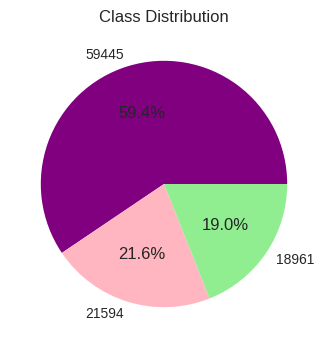

In [66]:
#Distribution of Class objects:
cls_count = df['class'].value_counts()
plt.figure(figsize=(4,4))
plt.pie(cls_count,labels=cls_count,autopct='%1.1f%%', colors=['purple','lightpink','lightgreen'])
plt.title('Class Distribution')
plt.show()

**Class Distribution**


*   Purple- Represents Galaxies(59.4% of total class).
*   Pink- Represent Stars with 21.6% of total.
*   Green- represents Quasars with the lowest count of 19.0% only.




In [67]:
#Distribution of color indices by class
fig = px.histogram(
    df,
    x='class',
    color= 'class',
    title='Distribution of Classes:'
)

fig.update_layout(
    xaxis_title='Class',
    yaxis_title='Count',
    margin=dict(l=40, r=40, t=40, b=40)

)

fig.show()

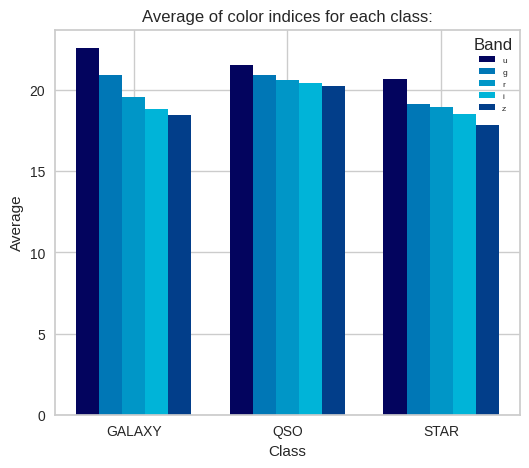

In [68]:
# Calculate the average magnitudes of color indices for each class
avg_value = df.groupby('class')[['u', 'g', 'r', 'i', 'z']].mean()
trans_value = avg_value.T # Transpose to make it easier for group plotting

#Class and Bands
classes=avg_value.index
bands=avg_value.columns

#Color codeing
colors = ['#03045E', '#0077B6', '#0096C7', '#00B4D8','#023E8A']

fig , ax = plt.subplots(figsize=(6,5))

#Bar position
x = np.arange(len(classes))
width = 0.15
n_bands =len(bands)

#Plot eaxh band
for i , band in enumerate(bands):
  ax.bar(
      x + i* width,
      avg_value[band],
      width,
      label=band,
      color=colors[i % len(colors)]
  )

  #Title and Labeling
  ax.set_title('Average of color indices for each class:')
  ax.set_xlabel('Class')
  ax.set_ylabel('Average')
  ax.set_xticks(x + (n_bands - 1) * width / 2)
  ax.set_xticklabels(classes)
  ax.legend(title="Band", fontsize=6)




**Average magnitudes of color indices for each class:**

The above image represents the bar chart of comarision of five different color features across the Three Classes Objects(Galaxies, Stars and Quasars). Each bar shows the avg magnitude in a particular band for a specific class.

*   **GALAXY**: u & g shows the lower avg magnitudes and r, i , z shows the higher avg magnitudes which is consistent with the presence of older stars within them.
*   **QUASAR:** the chart shows a slightly higher avg magnitude in the u & g and this indicates the characteristic of the active galactic nuclei.
*  **STAR:** The bar chart of stars show a declining shift  avg magnitudes from u & g towards r, i , z , which suggest that this is consistent with the presence of younger stars.



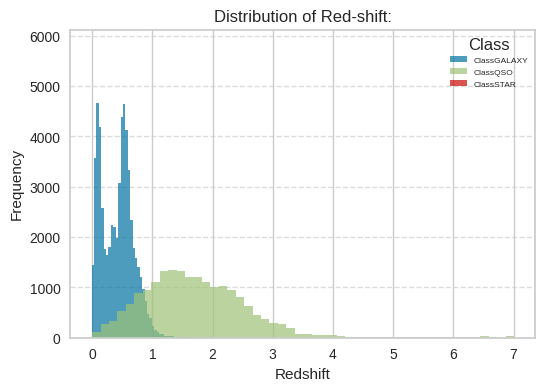

In [69]:
#Distribution of Redshift:
plt.figure(figsize=(6,4))


 #plt histograms for each class
for i , class_name in enumerate(df['class'].unique()):
  class_data=df[df['class'] == class_name]['redshift']
  plt.hist(
      class_data,
      bins=50,
      alpha=0.7,
      label=f'Class{class_name}',
      density=False
  )
 #Title and Labeling
plt.title('Distribution of Red-shift:')
plt.xlabel('Redshift')
plt.ylabel('Frequency')
plt.legend(title='Class', fontsize=6)
plt.grid(axis='y',linestyle='--',alpha=0.7)

# **Data Preprocessing:**

1.   **Data Cleaning**

*   Drop irrelevant columns.





2.   **Feature Engineering**

*   Selecting the features and target.


3.   **Lebeling the data**


*   Encoding target variables (Stars, Galaxies, Quasarrs as 0/1/2).


4.   **Train-Test-Split**


*   Spliting the features into 80% training and 20% testing .


5.   **Scaling Features**


*   Use Min-Max  to scaling the color indicies(u, g, r, i, z) using StandardScaler.





**Data Cleaning**

In [70]:
df_clean = df.drop(['run_ID', 'rerun_ID', 'cam_col', 'field_ID', 'spec_obj_ID', 'plate', 'MJD', 'fiber_ID'],axis=1, inplace=True)


**Feature Engineering**

In [71]:
#Seperate Features & Target:
feat = ['u', 'g', 'r', 'i', 'z', 'redshift']
target = 'class'

#Selecting featurees:
X = df[feat]
y = df[target]

**Label Encoding**

In [72]:
le = LabelEncoder()
y = le.fit_transform(y)

**Correlation Matrix**


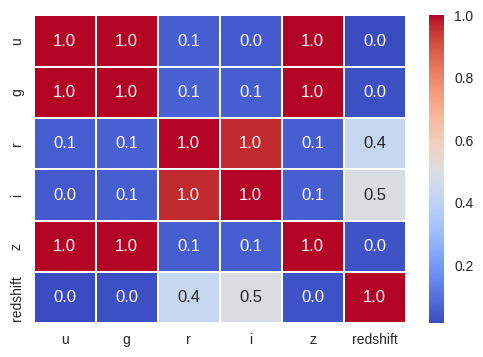

In [73]:
df = pd.get_dummies(df, drop_first=True)
correlation_matrix = X.corr()
plt.figure(figsize=(6, 4))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".1f", linewidths=0.1)
plt.show()

**Correlation Matrix:**
*  This is the visual represantation of the correlation between different features and class. Every box of the matrix shows the correlation coefficient between two variables.
*  -1 represent the perfect negative correlation.
*  1 represent the perfect positive correlation.

**Observations:**


*   The diagonally placed elements are 1(perfect positive correlation)
*   The color represent the strength and direction of the correlation."Red" means positive correlation, "Blue" indicates the negetive correlation.



**Train-Test-Split**

In [74]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.8, random_state=42, stratify=y)

**Scaling the Features**

In [75]:
sclr = StandardScaler()
X_train_sclr = sclr.fit_transform(X_train)
X_test_sclr = sclr.transform(X_test)

# **Model Initialization**




*   Why use so many? Because we don't know in advance that which strategy will give best result for our dataset. By trying all these different approaches, we can find the most accurate and reliable one for classifying stars, galaxies, and quasars.





*   We implement seven different strong Machine Learning classification algorithms to predict the objects.
*   Machine Learning Models:
1.  Decision Tree.

*  It's a single, complex flowchart. A flowchart of simple yes/no based in the dataset and follows the answer down the branches until it achive the final decision.

---



2.  Random Forest.
*   Instead of one complex flowchart, it creates hundreds of simpler, slightly different flowcharts. Just like a whole team of flowcharts voting together.

---

3.  K-Nearest Neighbors (K-NN).
*   It's a simple, intuitive method that finds the most similar known objects and copies their label.

---
4.  Support Vector Machine (SVM).
*    It's very effective for complex classifications where the groups aren't easily separated by simple lines. It's a boundary-drawing expert that aims for the widest possible margin.

---

5.  Gradient Boosting.
*   It's a sequence of flowcharts where each one learns from the last one's mistakes. It repeats this process many times, with each new model trying to fix the mistakes of the previous ones.

---
6.  AdaBoost.
*   It's another powerful boosting technique that is particularly good at making a strong model out of many weak ones. It's like Gradient Boosting but specifically focuses more weight on previous errors.

---
7.  XGBoost.
*   Highly optimized and  uses advanced math to make the "learn from your mistakes" process extremely fast and efficient. It's the super-charged, optimized version of Gradient Boosting.














In [76]:
#Define ML Models:
models = {
    "XGB": XGBClassifier(use_label_encoder=False, eval_metric='mlogloss', n_estimators=100),
    "AB": AdaBoostClassifier(n_estimators=100, random_state=42),
    "GB": GradientBoostingClassifier(n_estimators=100, random_state=42),
    "SVM": SVC(random_state=42),
    "KNN": KNeighborsClassifier(n_neighbors=5),
    "RF": RandomForestClassifier(n_estimators=100, random_state=42),
    "DT": DecisionTreeClassifier(max_depth=40, random_state=42)
}

#Show the results for every model:
result ={}
for name, model in models.items():
  model.fit(X_train_sclr, y_train)
  pred = model.predict(X_test_sclr)
  print('\nModel:', name)
  print(classification_report(y_test, pred, target_names=le.classes_))
  result[name] = (model, classification_report(y_test, pred, target_names=le.classes_, output_dict=True))


  joblib.dump(models, "stellar_object_classifier.joblib")

/usr/local/lib/python3.12/dist-packages/xgboost/training.py:183: UserWarning:

[08:44:32] WARNING: /workspace/src/learner.cc:738: 
Parameters: { "use_label_encoder" } are not used.





Model: XGB
              precision    recall  f1-score   support

      GALAXY       0.98      0.98      0.98     11889
         QSO       0.96      0.93      0.95      3792
        STAR       0.98      0.99      0.99      4319

    accuracy                           0.98     20000
   macro avg       0.97      0.97      0.97     20000
weighted avg       0.98      0.98      0.98     20000


Model: AB
              precision    recall  f1-score   support

      GALAXY       0.94      0.97      0.95     11889
         QSO       0.93      0.80      0.86      3792
        STAR       0.98      1.00      0.99      4319

    accuracy                           0.95     20000
   macro avg       0.95      0.92      0.93     20000
weighted avg       0.95      0.95      0.94     20000


Model: GB
              precision    recall  f1-score   support

      GALAXY       0.97      0.99      0.98     11889
         QSO       0.96      0.92      0.94      3792
        STAR       1.00      1.00      1.

**Finding Best Model**

In [77]:
#Finding best model:
best_model_name = max(result, key=lambda name: result[name][1]['accuracy'])
joblib.dump(best_model_name, "best_model_name.joblib")
print(f"Best Model Name: {best_model_name} with accuracy {result[best_model_name][1]['accuracy']:.4f}")


Best Model Name: RF with accuracy 0.9796


In [78]:
#Classification report for the best model
best_model_obj = result[best_model_name][0] # Get the model object from the result dictionary
y_pred_best = best_model_obj.predict(X_test_sclr)
target_names = ['GALAXY', 'STAR', 'QSO'] # Explicitly define target names
joblib.dump(best_model_obj, "stellar_best_model_obj.joblib")
print(classification_report(y_test, y_pred_best, target_names=target_names))

              precision    recall  f1-score   support

      GALAXY       0.98      0.99      0.98     11889
        STAR       0.97      0.93      0.95      3792
         QSO       1.00      1.00      1.00      4319

    accuracy                           0.98     20000
   macro avg       0.98      0.97      0.98     20000
weighted avg       0.98      0.98      0.98     20000



**Hypertuneing For The Best Model**

In [88]:
#Hyperparameter tuning
if best_model_name == 'RF':
  pm_grid = {
      'n_estimators': [20, 50, 100],
      'max_depth': [None, 5, 10],
      'min_samples_split': [2, 5, 10]
  }
grid_srch = GridSearchCV(RandomForestClassifier(random_state=42),pm_grid, cv=5, scoring='accuracy')
grid_srch.fit(X_train_sclr, y_train)
joblib.dump(grid_srch,  "grid_srch.joblib")
print(grid_srch.best_params_)
print(grid_srch.best_score_)

{'max_depth': None, 'min_samples_split': 10, 'n_estimators': 100}
0.9782499999999998


**Feature Importance**

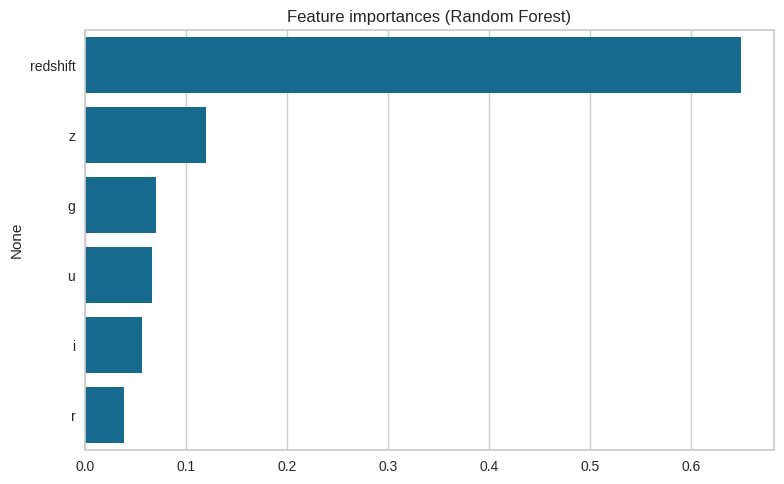

In [79]:
# Feature importance:
try:
    importances = best_model_obj.feature_importances_
    feat_names = X.columns
    fi = pd.Series(importances, index=feat_names).sort_values(ascending=False)

    joblib.dump(fi , "fi.joblib")
    plt.figure(figsize=(8,5))
    sns.barplot(x=fi.values, y=fi.index)
    plt.title('Feature importances (Random Forest)')
    plt.tight_layout()
    plt.show()
except AttributeError:
    print(f'Feature importance not available for {best_model_name} model.')
except Exception as e:
    print('An error occurred:', e)

**Confusion Matrix**

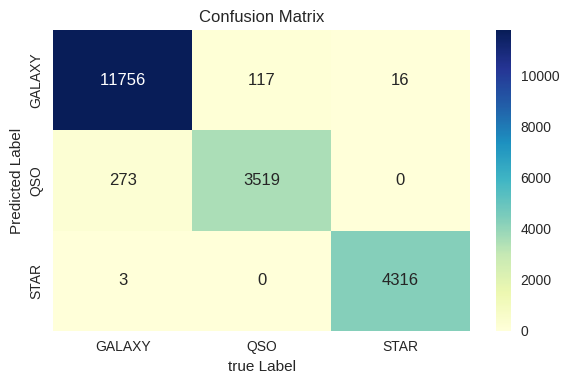

In [80]:
plt.figure(figsize=(6,4))
cm = confusion_matrix(y_test, y_pred_best)
joblib.dump(cm, "cm.joblib")
sns.heatmap(cm, annot=True, fmt='d',cmap='YlGnBu', xticklabels=le.classes_,yticklabels=le.classes_)
plt.title("Confusion Matrix")
plt.xlabel('true Label')
plt.ylabel('Predicted Label')
plt.tight_layout()
plt.savefig('Confussion Matrix')
plt.show()

**Model Comparison**

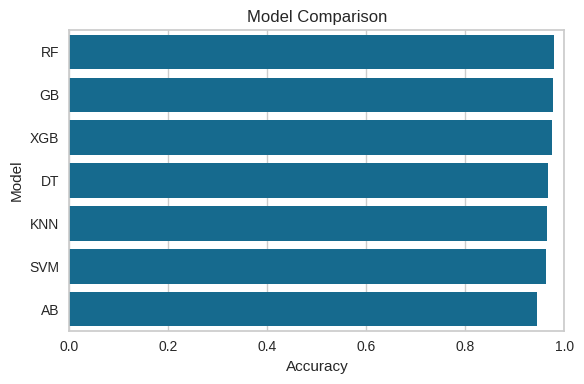

In [81]:
plt.figure(figsize=(6,4))
# Extract model names and their accuracy scores from the result dictionary
model_names = list(result.keys())
accuracy_scores = [result[name][1]['accuracy'] for name in model_names]

# Create a DataFrame for plotting
model_df = pd.DataFrame({'Model': model_names, 'Accuracy': accuracy_scores})

# Sort the DataFrame by accuracy
model_df_sorted = model_df.sort_values('Accuracy', ascending=False)

joblib.dump(model_df_sorted, "model_df_sorted.joblib")

# Create the bar plot
sns.barplot(x='Accuracy', y='Model', data=model_df_sorted)
plt.title('Model Comparison')
plt.xlim(0,1)
plt.tight_layout()
plt.savefig("Model Comparison")
plt.show()

**Redshift**

In [86]:
plt.figure(figsize=(6,4))
sns.boxplot(x='class', y='redshift', data=df)
plt.title('Red-shift')
plt.tight_layout()
plt.show()

ValueError: Could not interpret value `class` for `x`. An entry with this name does not appear in `data`.

<Figure size 600x400 with 0 Axes>

**ROC_AUC Curve**

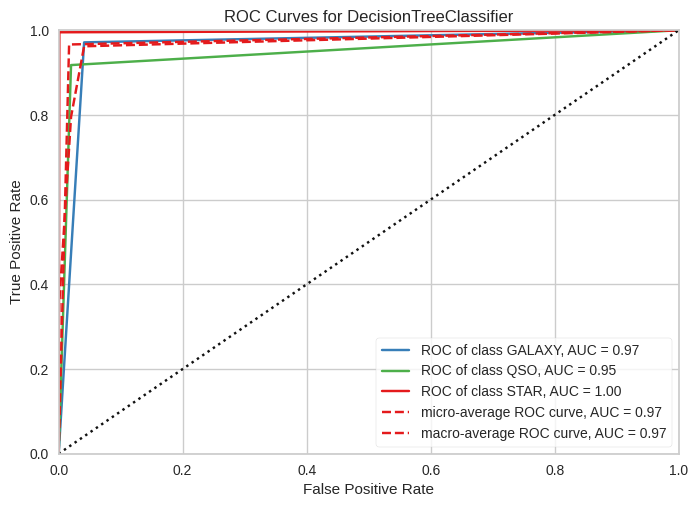

<Axes: title={'center': 'ROC Curves for DecisionTreeClassifier'}, xlabel='False Positive Rate', ylabel='True Positive Rate'>

In [83]:
#Create ROC AUC visualizer
Visualizer = ROCAUC(model, classes=le.classes_)

#Set a bold color palette
set_palette('bold')

#Fit the visualizer
Visualizer.fit(X_train_sclr, y_train)

#Score the model
Visualizer.score(X_test_sclr, y_test)

#finalin
Visualizer.show()

Errors during Class Prediction

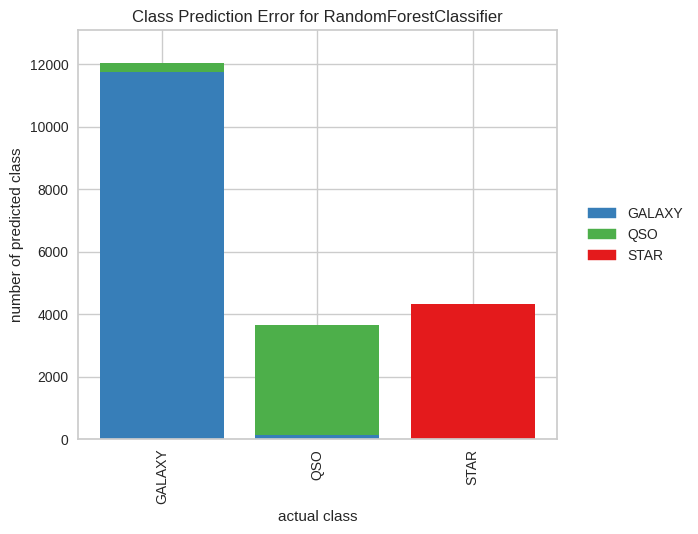

<Axes: title={'center': 'Class Prediction Error for RandomForestClassifier'}, xlabel='actual class', ylabel='number of predicted class'>

In [87]:
rf_clf = RandomForestClassifier(random_state=42, n_estimators=100)
rf_clf.fit(X_train_sclr, y_train)


joblib.dump(rf_clf,"rf_clf.joblib")

visualizer = ClassPredictionError(rf_clf, classes=le.classes_)

visualizer.fit(X_train_sclr, y_train)

visualizer.score(X_test_sclr, y_test)

visualizer.show()


# **RECOMMENDATIONS:**
*   Adopt the Best-Performing Model
       *  The Random Forest and XGBoost models consistently achieved the highest accuracy (≈98%).
Recommendation: Use one of these as the primary classification engine for astronomical surveys and automated object detection pipelines.
*   Support Research & Funding Decisions
       *  Accurate classification helps allocate expensive telescope time more efficiently (e.g., follow-up on QSOs since they are rarer and more valuable for cosmology).
Recommendation: Direct funding and research focus toward building a scalable system that integrates these models into observatories.

*    Future Improvements
        *  While stars and galaxies are easy to classify, QSOs are slightly trickier.
Recommendation: Invest in additional training data and feature engineering for QSOs to reduce misclassification.





